# Questions to answer:
- In how many speeches does the word “democracy” appear? 
- In which years did Putin most often mention …?
- How often does he mention NATO expansion - before and after 2004? 
- How often does he speak about “threats” before and after 2014? 
- At what point does Putin start talking about a “multipolar world”?

In [1]:
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt

# df_talks = pd.read_json('data/putin_complete.json')
df_talks = pd.read_csv('data/putins_talks_prepared.csv')
df_talks.head()

,date,persons,transcript_unfiltered,kremlin_id,place,title,teaser,tags,transcript_filtered,wordlist,grouped_tages
0,2012-05-07 12:20:00,[],The ceremony opened with the Russian State Fla...,15224.0,"The Kremlin, Moscow",Vladimir Putin inaugurated as President of Russia,The inauguration ceremony took place in the Gr...,[],"Citizens of Russia, friends, The inauguration ...","['citizen', 'of', 'Russia', ',', 'friend', ','...",[]
1,2012-05-08 16:00:00,[],State Duma deputies approved Dmitry Medvedev a...,15266.0,Moscow,State Duma plenary session,Vladimir Putin presented the candidacy of Dmit...,['Civil service'],"Mr Naryshkin, deputies of the Russian parliame...","['Mr', 'Naryshkin', ',', 'deputy', 'of', 'the'...",['State_Governance_Public_Service']
2,2012-05-09 11:00:00,[],"More than 14,000 military servicemen took part...",15271.0,Moscow,Military parade celebrating the 67th anniversa...,Vladimir Putin attended the military parade on...,['Armed Forces'],Citizens of Russia! Veterans! Comrade soldiers...,"['citizen', 'of', 'Russia', '!', 'veteran', '!...",['Security_Defense_Enforcement']
3,2012-05-09 13:00:00,[],* * * President of Russia Vladimir Putin: Vete...,15272.0,NaN,Reception marking the 67th anniversary of vict...,A reception marking the 67th anniversary of vi...,[],"Veterans, colleagues, friends! We all share th...","['veteran', ',', 'colleague', ',', 'friend', '...",[]
4,2012-05-10 14:00:00,[],Vladimir Putin thanked the members of the plan...,15282.0,Nizhny Tagil,Visit to Research and Production Corporation U...,"In Nizhny Tagil, Vladimir Putin visited Uralva...",['Regions'],"Good afternoon, I want to thank all of you for...","['good', 'afternoon', ',', 'I', 'want', 'to', ...",['State_Governance_Public_Service']


In how many speeches does the word “democracy” appear? 

,date,persons,transcript_unfiltered,kremlin_id,place,title,teaser,tags,transcript_filtered,wordlist,grouped_tages
0,2012-05-07 12:20:00,[],The ceremony opened with the Russian State Fla...,15224.0,"The Kremlin, Moscow",Vladimir Putin inaugurated as President of Russia,The inauguration ceremony took place in the Gr...,[],"Citizens of Russia, friends, The inauguration ...","['citizen', 'of', 'Russia', ',', 'friend', ','...",[]
34,2012-05-26 14:00:00,[],The congress participants unanimously elected ...,15445.0,Moscow,Vladimir Putin took part in the United Russia ...,NaN,['Parties'],"Colleagues, friends, I am happy to greet all t...","['colleague', ',', 'friend', ',', 'I', 'be', '...",['State_Governance_Public_Service']
136,2012-07-31 17:00:00,[],The President met with forum participants and ...,16104.0,Seliger,Seliger 2012 National Youth Education Forum,Vladimir Putin visited the Seliger 2012 Nation...,['Science and innovation'],It is a great pleasure to be here for the thir...,"['it', 'be', 'a', 'great', 'pleasure', 'to', '...",['Science_IT_Space']
158,2012-08-24 19:40:00,[],The Council includes representatives from all ...,16292.0,Saransk,Meeting of Council for Interethnic Relations,Vladimir Putin held the first meeting of the P...,['Interethnic relations'],"Good afternoon, colleagues, friends, I welcome...","['good', 'afternoon', ',', 'colleague', ',', '...",['Culture_Identity_History']
192,2012-09-13 19:30:00,[],"* * * Question: Yesterday, the US ambassador t...",16477.0,Sochi,Vladimir Putin’s comments on events in Libya,Vladimir Putin answered a journalist’s questio...,['Foreign policy'],Of course I know about it. And there can only ...,"['of', 'course', 'I', 'know', 'about', 'it', '...",['International_Relations_Global_Organizations']


The word "democracy" appears in 120 speeches.


,date,democracy_count
0,2012-05-07 12:20:00,1
34,2012-05-26 14:00:00,4
136,2012-07-31 17:00:00,1
158,2012-08-24 19:40:00,1
192,2012-09-13 19:30:00,1


democracy_count
1     62
2     26
3     11
4      8
5      4
6      3
7      1
8      3
11     1
13     1
Name: count, dtype: int64

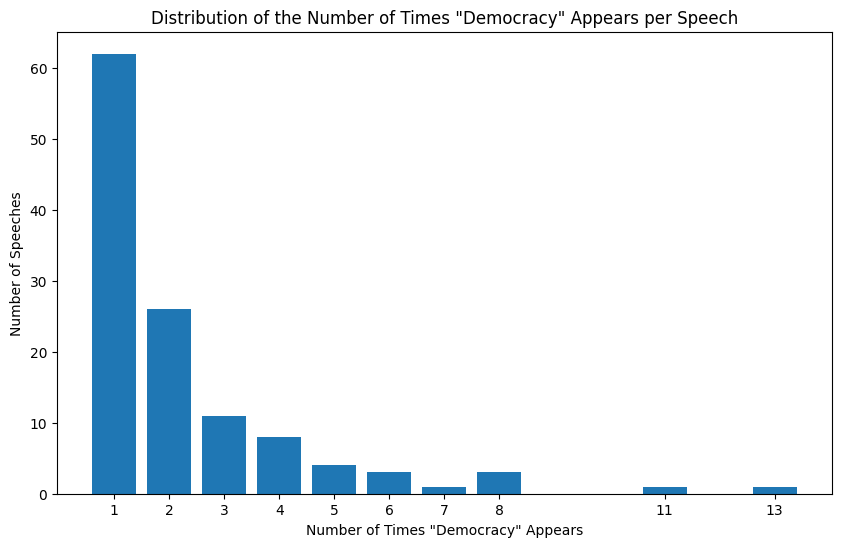

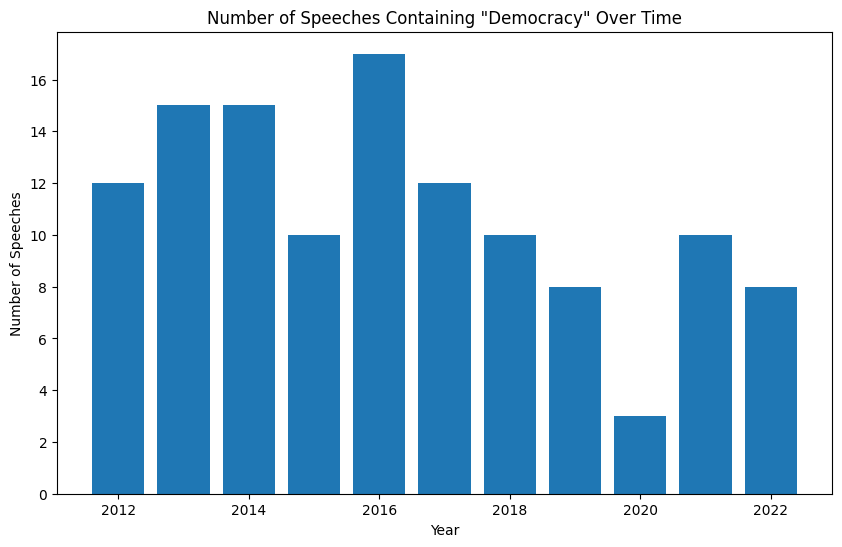

In [34]:
# In how many speeches does the word “democracy” appear?
df_democracy = df_talks[df_talks['wordlist'].str.contains('democracy', case=False)].copy()
display(df_democracy.head())
democracy_count = df_democracy.shape[0]
print(f'The word "democracy" appears in {democracy_count} speeches.')

# Calculate per speech the number of times the word “democracy” appears.
df_democracy.loc[:, 'democracy_count'] = df_democracy['wordlist'].str.lower().str.count('democracy')
display(df_democracy[['date', 'democracy_count']].head())

# Distribution of the number of times the word “democracy” appears per speech.
democracy_distribution = df_democracy['democracy_count'].value_counts().sort_index()
display(democracy_distribution)

# Plot the distribution.
plt.figure(figsize=(10, 6))
plt.bar(democracy_distribution.index, democracy_distribution.values)
plt.title('Distribution of the Number of Times "Democracy" Appears per Speech')
plt.xlabel('Number of Times "Democracy" Appears')
plt.ylabel('Number of Speeches')
plt.xticks(democracy_distribution.index)
plt.show()

# Plot the number of speeches containing the word “democracy” over time (by year).
df_democracy.loc[:, 'year'] = df_democracy['date'].str[:4].astype(int)
democracy_by_year = df_democracy.groupby('year').size()
plt.figure(figsize=(10, 6))
plt.bar(democracy_by_year.index, democracy_by_year.values)
plt.title('Number of Speeches Containing "Democracy" Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.show()

In [35]:
# In which years did Putin most often mention “freedom”?
df_freedom = df_talks[df_talks['wordlist'].str.contains('freedom', case=False)].copy()
df_freedom.loc[:, 'year'] = df_freedom['date'].str[:4].astype(int)
freedom_by_year = df_freedom.groupby('year').size().sort_values(ascending=False)
display(freedom_by_year.head(5))

year
2022    40
2014    36
2018    35
2015    33
2019    32
dtype: int64

In [8]:
# How often does he mention NATO expansion - before and after 2004?
df_all = pd.read_json('data/putin_complete.json')
df_all = df_all[df_all['transcript_filtered'] != '']
display(df_all.head())

,date,persons,transcript_unfiltered,kremlin_id,place,title,teaser,tags,transcript_filtered,wordlist
0,1999-12-31 00:01:00,[],"Vladimir Putin: Dear friends, On New Year’s Ev...",22280.0,"The Kremlin, Moscow",New Year Address by Acting President Vladimir ...,,[],"Dear friends, On New Year’s Eve, my family and...","[dear, friend, ,, on, New, Year, ’s, Eve, ,, m..."
1,1999-12-31 00:02:00,[],"Vladimir Putin: Good afternoon, distinguished ...",22326.0,"The Kremlin, Moscow",Address at an expanded meeting of the Russian ...,,[],"Good afternoon, distinguished colleagues. This...","[good, afternoon, ,, distinguished, colleague,..."
3,2000-01-04 00:00:00,[],"Question: Mr Putin, the sudden resignation of ...",24377.0,Moscow,Interview with the ORT TV Channel,,[],Let’s try. It was about ten days before the Ne...,"[let, ’s, try, ., , it, be, about, ten, day, ..."
4,2000-01-11 00:00:00,[],"Vladimir Putin: Dear friends, We are again gat...",24116.0,"State Kremlin Palace, Moscow",Speech at gala function marking the second mil...,,[],"Dear friends, We are again gathered here today...","[dear, friend, ,, we, be, again, gather, here,..."
5,2000-01-15 00:00:00,[],"Sergei Dorenko: Mr. Putin, how do you like you...",24123.0,,Interview with ORT Channel,,[],"No, they aren’t. The amount of work is about t...","[no, ,, they, be, n’t, ., , the, amount, of, ..."


In [11]:
df_nato = df_all[df_all['wordlist'].apply(
    lambda lst: any(word.lower() == 'nato' for word in lst)
)].copy()
df_nato['year'] = pd.to_datetime(df_nato['date']).dt.year
nato_before_2004 = (df_nato['year'] < 2004).sum()
nato_after_2004 = (df_nato['year'] >= 2004).sum()
print(f'Number of speeches mentioning NATO before 2004: {nato_before_2004}')
print(f'Number of speeches mentioning NATO after 2004: {nato_after_2004}')
# wyszukiwanie kontekstu (zdania zawierające NATO) -> czy przed i po 2004 zmienił się kontekst wypowiedzi?

Number of speeches mentioning NATO before 2004: 92
Number of speeches mentioning NATO after 2004: 354


In [12]:
# How often does he speak about “threats” before and after 2014? 
df_threats = df_all[df_all['wordlist'].apply(
    lambda lst: any('threat' in word.lower() for word in lst)
)].copy()
df_threats['year'] = pd.to_datetime(df_threats['date']).dt.year
threats_before_2014 = (df_threats['year'] < 2014).sum()
threats_after_2014 = (df_threats['year'] >= 2014).sum()
print(f'Number of speeches mentioning threats before 2014: {threats_before_2014}')
print(f'Number of speeches mentioning threats after 2014: {threats_after_2014}')

Number of speeches mentioning threats before 2014: 824
Number of speeches mentioning threats after 2014: 613


year
2001     1
2002     1
2003     3
2004     1
2005     2
2006     1
2007     8
2008    12
2009    10
2010     9
2011     5
2012     5
2013     2
2014     5
2016     3
2017     3
2018     4
2019     8
2020     1
2021     4
2022    20
dtype: int64

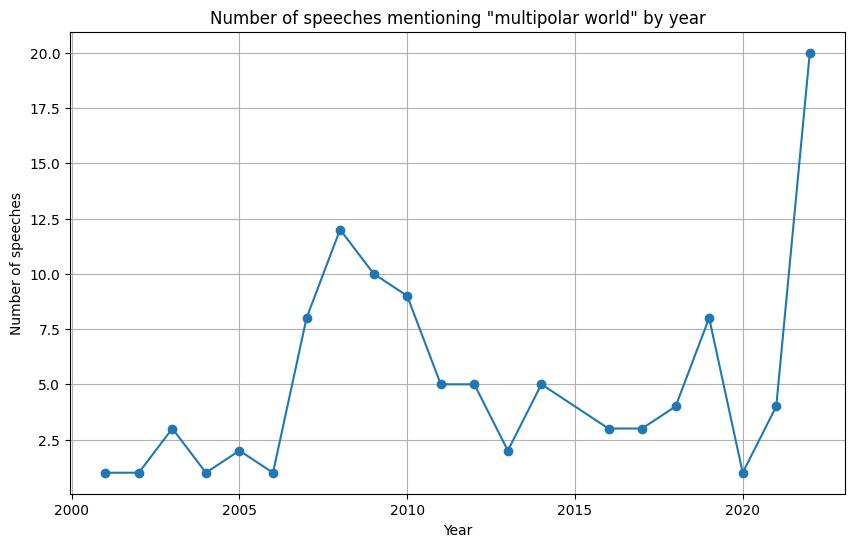

In [13]:
# At what point does Putin start talking about a “multipolar world”?
df_multipolar = df_all[df_all['wordlist'].apply(
    lambda lst: any('multipolar' in word.lower() for word in lst)
)].copy()
df_multipolar['year'] = pd.to_datetime(df_multipolar['date']).dt.year
multipolar_by_year = df_multipolar.groupby('year').size().sort_index()
display(multipolar_by_year)
plt.figure(figsize=(10, 6))
plt.plot(multipolar_by_year.index, multipolar_by_year.values, marker='o')
plt.title('Number of speeches mentioning "multipolar world" by year')
plt.xlabel('Year')
plt.ylabel('Number of speeches')
plt.grid(True)
plt.show()